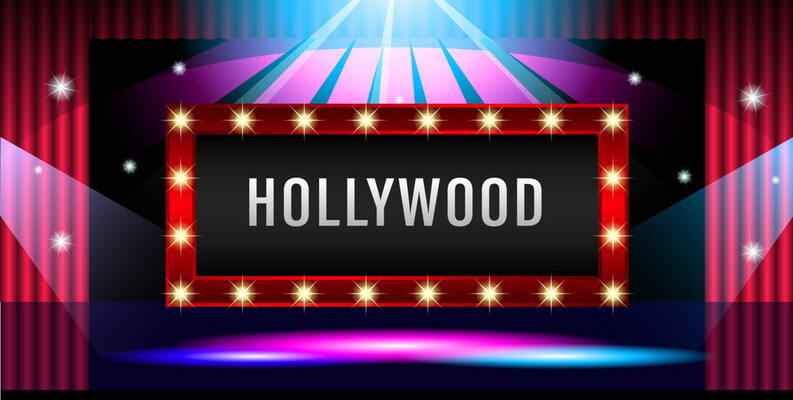

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the file

In [2]:
df = pd.read_csv('/kaggle/input/9000-movies-dataset/mymoviedb.csv', lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [6]:
## now the data is already clean ang we'll go the next step (EDA)
## i found that the last feature isn't important that much so i'll drop it
df.drop(['Poster_Url','Overview'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Popularity         9827 non-null   float64       
 3   Vote_Count         9827 non-null   int64         
 4   Vote_Average       9827 non-null   float64       
 5   Original_Language  9827 non-null   object        
 6   Genre              9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 537.5+ KB


# EDA

# 1) what is the movie with highest popularity?
let's see :

In [7]:
sorted_df=df.sort_values(by='Popularity',ascending=False)
sorted_df.head(10)
## as we can see Spider-Man: No Way Home is the highest one in popularity

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"
5,2022-01-07,The Commando,1750.484,33,6.6,en,"Action, Crime, Thriller"
6,2022-01-12,Scream,1675.161,821,6.8,en,"Horror, Mystery, Thriller"
7,2022-02-10,Kimi,1601.782,206,6.3,en,Thriller
8,2022-02-17,Fistful of Vengeance,1594.013,114,5.3,en,"Action, Crime, Fantasy"
9,2021-11-03,Eternals,1537.406,4726,7.2,en,Science Fiction


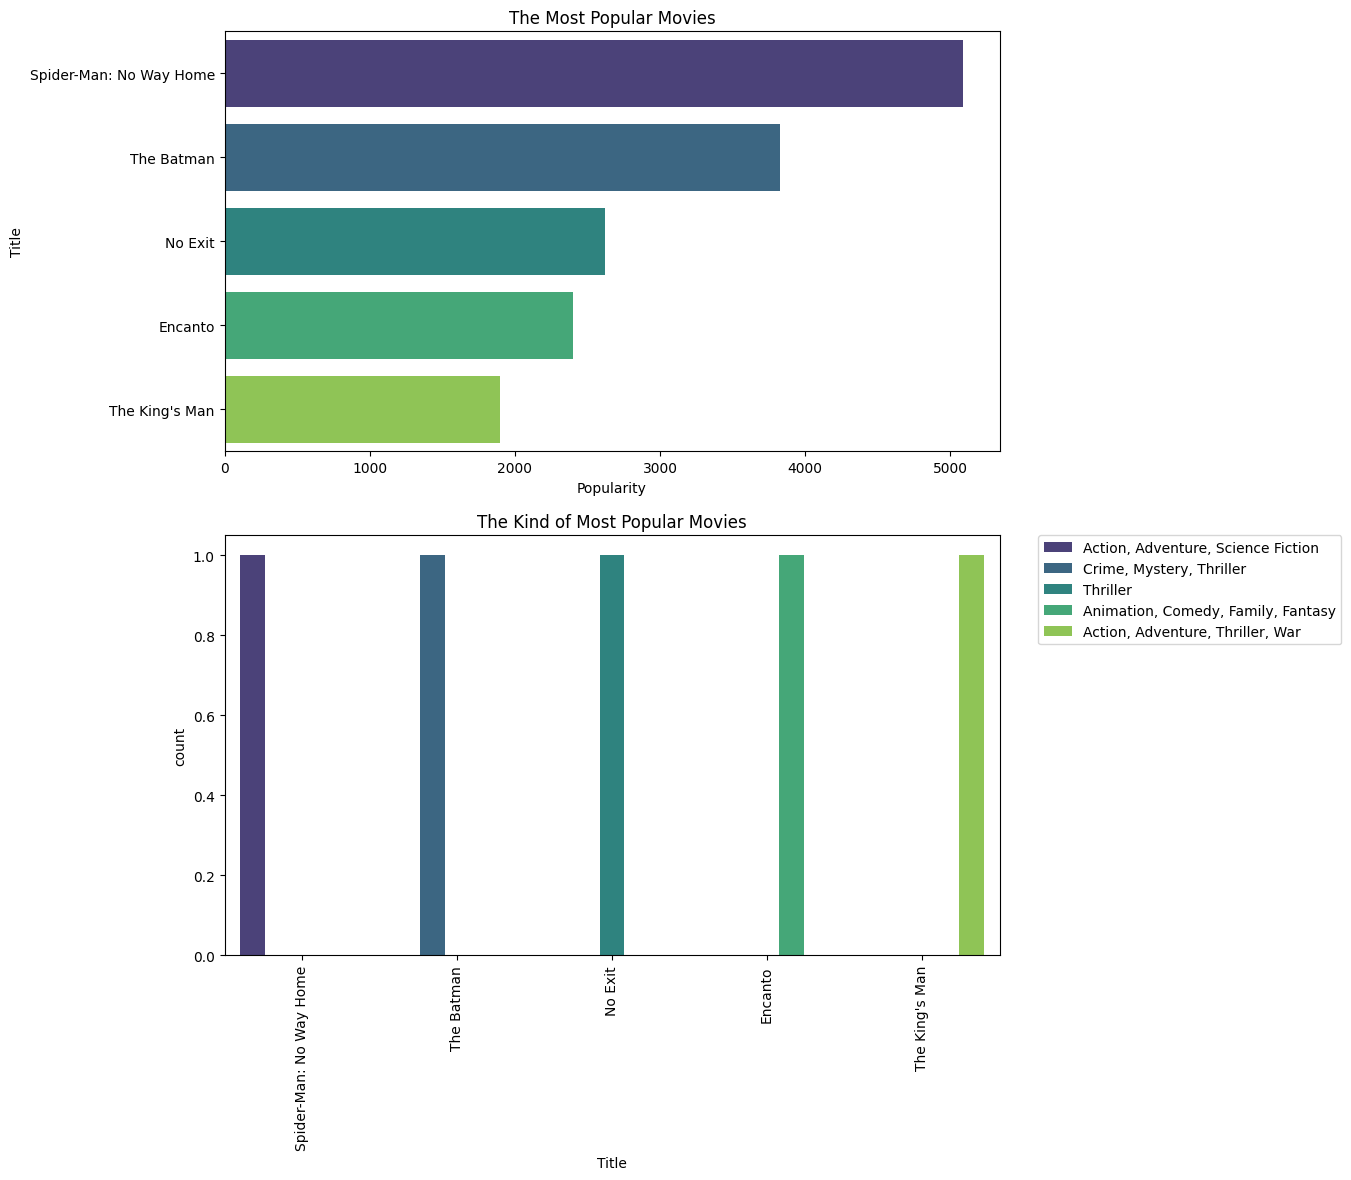

In [8]:
## now let's visualize it to be clear
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(data=sorted_df.head(5), y='Title', x='Popularity', palette='viridis', ax=axes[0])
plt.xticks(rotation=90)
axes[0].set_title("The Most Popular Movies")

sns.countplot(data=sorted_df.head(5), x='Title', hue='Genre', palette='viridis', ax=axes[1])
plt.xticks(rotation=90)
axes[1].set_title("The Kind of Most Popular Movies")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)

plt.show()

Text(0.5, 1.0, 'The Most popular Movies and its Kind')

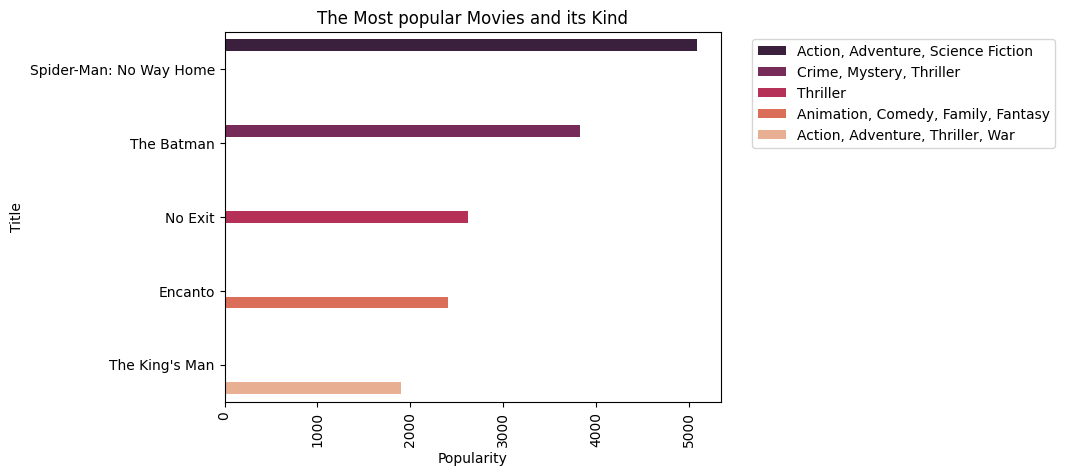

In [9]:
sns.barplot(data=sorted_df,y=sorted_df['Title'].head(5),x=sorted_df['Popularity'],palette='rocket',hue=sorted_df['Genre'].head(5))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("The Most popular Movies and its Kind")

* Spider-Man: No Way Home is the highest one in popularity 

* Its kind is Action, Adventure, Science Fiction

# What is the most film Genre ?
let's see :

In [10]:
count_genre=df['Genre'].value_counts()
count_genre.head(10)
## As we can see it is Drama (there are 466 drama films) but lets visualize it

Genre
Drama                     466
Comedy                    403
Drama, Romance            248
Horror                    238
Horror, Thriller          199
Comedy, Romance           196
Documentary               139
Comedy, Drama             137
Action, Thriller          125
Comedy, Drama, Romance    107
Name: count, dtype: int64

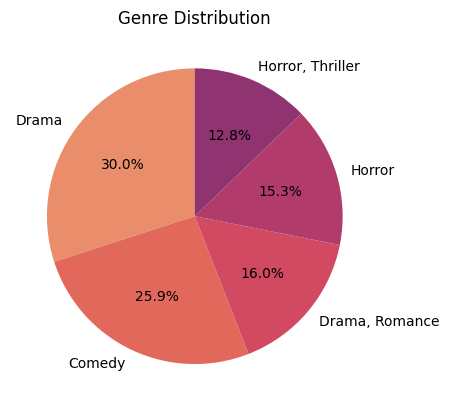

In [11]:
c = sns.color_palette("flare")
plt.pie(count_genre.head(5), labels=count_genre.head(5).index, autopct='%1.1f%%', startangle=90, colors=c)
plt.title('Genre Distribution')
plt.show()

In [12]:
df1 = df.copy()
df1['Genre'] = df1['Genre'].str.split(', ')
df1 = df1.explode('Genre')
df1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction
1,2022-03-01,The Batman,3827.658,1151,8.1,en,Crime
1,2022-03-01,The Batman,3827.658,1151,8.1,en,Mystery


In [13]:
df1['Genre'].value_counts().index

Index(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance',
       'Horror', 'Animation', 'Family', 'Fantasy', 'Science Fiction', 'Crime',
       'Mystery', 'History', 'War', 'Music', 'Documentary', 'TV Movie',
       'Western'],
      dtype='object', name='Genre')

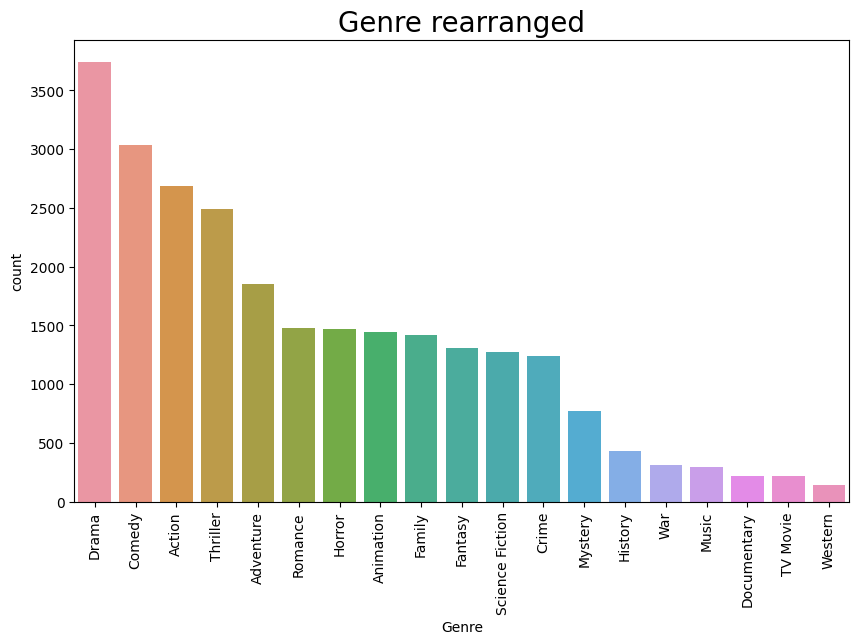

In [14]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x = 'Genre', data = df1, order = df1['Genre'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Genre rearranged', fontsize = 20)
plt.show()

* The most film genre is Drama with 30%
* Comedy comes in the Second stage then Drama, Romance 

#  What year was the largest number of films produced?
lets see

In [15]:
years=df['Release_Date'].dt.year
year=years.value_counts()
## As we can see it is 2021 it had been produced 714 movies but lets visualize it
year.head(10)

Release_Date
2021    714
2018    530
2017    510
2019    500
2016    470
2020    453
2015    390
2014    371
2013    348
2011    316
Name: count, dtype: int64

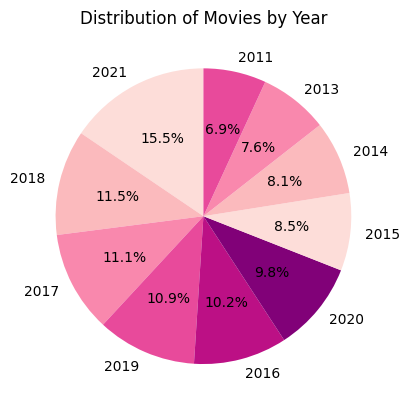

In [16]:
c1 = sns.color_palette("RdPu")
plt.pie(year.head(10), labels=year.head(10).index, autopct='%1.1f%%', startangle=90,colors=c1)
plt.title('Distribution of Movies by Year')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


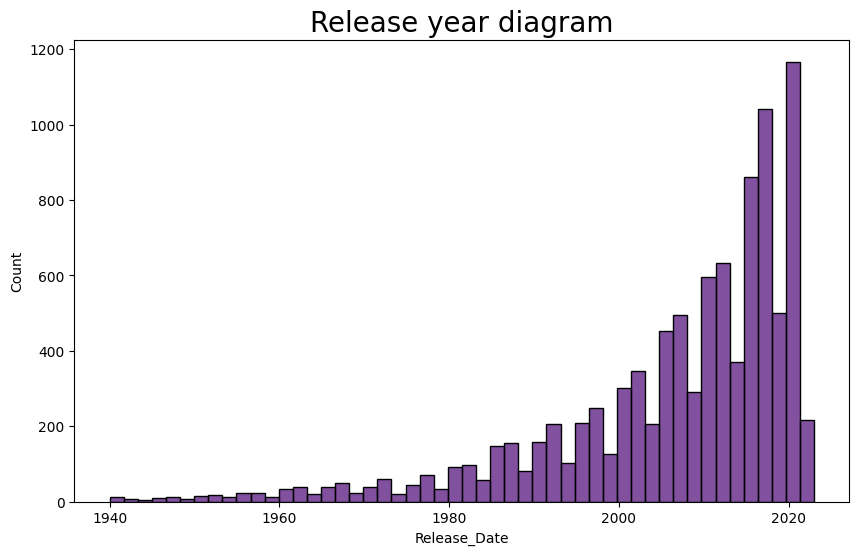

In [17]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(x = years, bins = 50, binrange = (1940, 2023),color='#57167E')
plt.title('Release year diagram', fontsize = 20)
plt.show()

* The largest number of films (714 films) produced in 2021 
* then 2018 there are 530 films produces in this year

# What kind of movies take the highest rating?
lets see

In [18]:
highest_avg_rate=df.sort_values(by='Vote_Average',ascending=False)
highest_avg_rate.head(10)
## As we can see the highest movie rate is Kung Fu Master Huo Yuanjia film and its genre Action, Drama
## But it is not logically true there is 1 vote count and the rating is 10
## so i'll take a look at Vote_Count statistics

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
9391,2020-04-09,Kung Fu Master Huo Yuanjia,13.745,1,10.0,zh,"Action, Drama"
7339,2018-06-08,Franco Escamilla: Por La Anécdota,16.158,92,9.2,es,Comedy
667,2019-03-29,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,86.689,27,9.1,ja,"Action, Animation, Fantasy"
2325,2021-06-17,Impossible Things,36.466,82,9.1,es,"Family, Drama"
7401,2020-10-30,My Sex Doll,16.088,4,9.0,th,"Comedy, Romance"
7014,2018-05-16,Sex School: Dorms of Desire,16.683,1,9.0,en,Comedy
6728,2021-11-18,Mission «Sky»,17.133,34,9.0,ru,"Drama, War"
2391,2020-10-14,The Three Deaths of Marisela Escobedo,35.767,183,9.0,es,"Documentary, Crime"
7039,2019-08-07,Bring the Soul: The Movie,16.652,323,8.9,ko,"Music, Documentary"
5069,2021-08-19,"Ni tuyo, Ni mía",20.696,49,8.9,es,Drama


In [19]:
df['Vote_Count'].describe()
## there are big difference between the min and max

count     9827.000000
mean      1392.805536
std       2611.206907
min          0.000000
25%        146.000000
50%        444.000000
75%       1376.000000
max      31077.000000
Name: Vote_Count, dtype: float64

I done my search and found that :
When dealing with rating systems, especially in datasets where the number of votes (or vote count) is low, it's essential to consider both the average vote and the number of votes. A film with a perfect rating from a single vote might not be as reliable an indicator of quality as a film with a high average rating from a significant number of votes.

One commonly used metric that takes both average vote and vote count into account is the Weighted Rating or Weighted Average. The idea is to give more weight to movies with a higher number of votes.

WR=(v/m+v)⋅R)+((m/v+m)⋅C)

Where:
v is the number of votes for the movie.

m is the minimum votes required to be listed (you can choose this threshold based on your dataset or a standard value).

R is the average rating of the movie.

C is the mean rating across the whole dataset

In [20]:
C=df['Vote_Average'].mean()
## i'll make it the median as it is near to max
m=df['Vote_Count'].quantile(0.50)

def weighted_rating(row):
    v = row['Vote_Count']
    R = row['Vote_Average']
    return (v / (v + m) * R) + (m / (v + m) * C)


df['Weighted_Rating'] = df.apply(weighted_rating, axis=1)

# Sort movies based on weighted ratings
sorted_movies = df.sort_values(by='Weighted_Rating', ascending=False)
sorted_movies.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Weighted_Rating
657,1994-09-23,The Shawshank Redemption,87.669,20911,8.7,en,"Drama, Crime",8.653002
609,1972-03-14,The Godfather,93.136,15614,8.7,en,"Drama, Crime",8.637499
1317,1993-11-30,Schindler's List,55.225,12474,8.6,en,"Drama, History, War",8.525743
1007,1974-12-20,The Godfather: Part II,65.324,9393,8.6,en,"Drama, Crime",8.502486
221,2008-07-14,The Dark Knight,173.923,26994,8.5,en,"Drama, Action, Crime, Thriller",8.466658


Text(0.5, 1.0, 'The Highest rated Movies and its Kind')

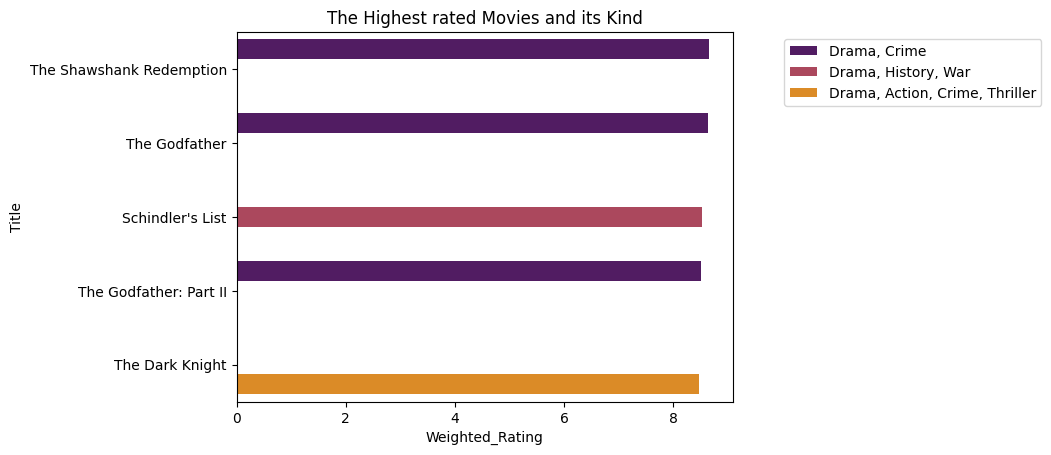

In [21]:
sns.barplot(data=sorted_movies.head(5),y=sorted_movies['Title'].head(5),x=sorted_movies['Weighted_Rating'].head(5),palette='inferno',hue=sorted_movies['Genre'].head(5))
plt.legend(bbox_to_anchor=(1.09, 1), loc='upper left')
plt.title("The Highest rated Movies and its Kind")


* The highest movie rate is The Shawshank Redemption film 
* Its genre Drama, Crime
* Its rate is 8.560439

# Iam curious now with one with lowest rate 
lets see

In [22]:
lowest_rate=df.sort_values(by='Weighted_Rating',ascending=True)
lowest_rate.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Weighted_Rating
1295,2009-03-12,Dragonball Evolution,55.831,1623,2.8,en,"Action, Adventure, Fantasy, Science Fiction, T...",3.581787
7381,2008-08-29,Disaster Movie,16.109,809,3.3,en,Comedy,4.412492
3423,2017-08-25,Death Note,27.384,3424,4.2,en,"Crime, Drama, Fantasy, Horror, Thriller",4.457072
430,1997-06-20,Batman & Robin,116.710,4044,4.3,en,"Science Fiction, Action, Fantasy",4.511665
9314,2013-07-11,Sharknado,13.820,1293,3.9,en,"Fantasy, Horror, Action, Comedy, TV Movie, Sci...",4.549138
1308,2015-08-05,Fantastic Four,55.590,5078,4.4,en,"Action, Adventure, Science Fiction",4.563990
3861,2007-01-25,Epic Movie,25.102,1201,3.9,en,"Comedy, Action, Adventure",4.585443
2223,2008-01-24,Meet the Spartans,37.750,1291,4.0,en,Comedy,4.624296
1846,2005-02-18,Son of the Mask,43.180,1428,4.2,en,"Fantasy, Comedy, Family, Adventure",4.731172
2054,2011-11-11,Jack and Jill,39.892,1713,4.3,en,Comedy,4.740405


Text(0.5, 1.0, 'The Lowest rated Movies and its Kind')

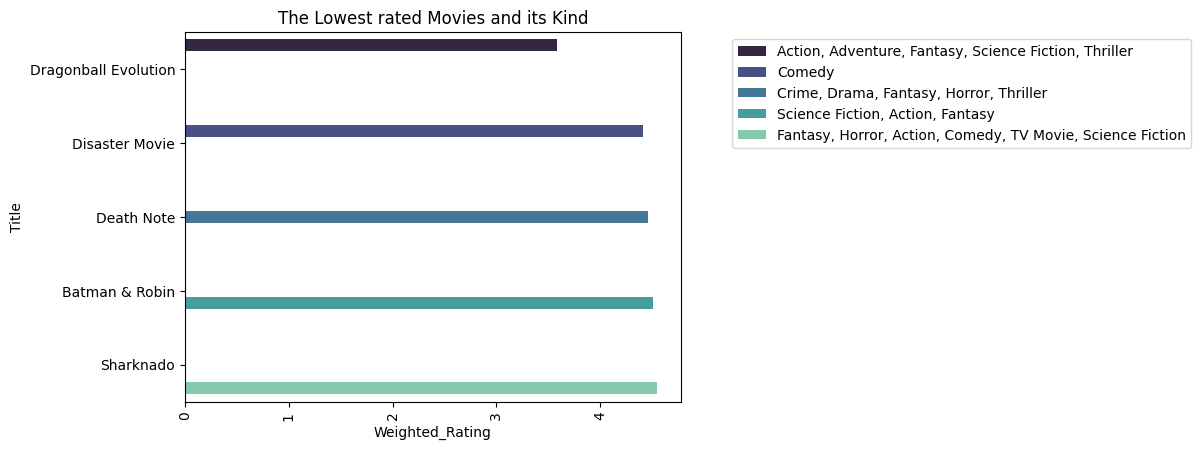

In [23]:
sns.barplot(data=lowest_rate.head(5),y=lowest_rate['Title'].head(5),x=lowest_rate['Weighted_Rating'].head(5),palette='mako',hue=lowest_rate['Genre'].head(5))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.09, 1), loc='upper left')
plt.title("The Lowest rated Movies and its Kind")


* The film with the lowest rate is Dragonball Evolution
* and its kind Action, Adventure, Fantasy, Science Fiction

# I saw that there are movies that have zero vote count and 0 average rate 
I am curious about ho many movies that has zero count vote

Text(0.5, 1.0, 'Number of Movies with Vote Average')

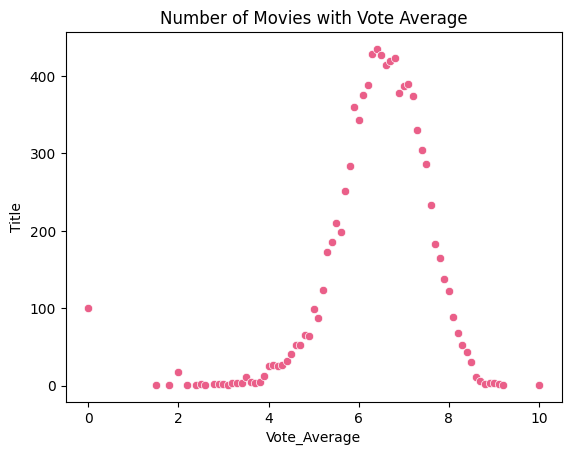

In [24]:
lowest_av_rate=df.sort_values(by='Vote_Average',ascending=True)
l=lowest_av_rate.groupby('Vote_Average')['Title'].count()
sns.scatterplot(l,color='#EA5F89')
plt.title("Number of Movies with Vote Average")

* there are 100 films with zero count vote and average rate
* Examples of them :Sideshow ,Bergen and That Which Does Not Kill

# Aren't you curious about the least popular film
as we knew the most popular one 
lets know:

In [25]:
least_popular=df.sort_values(by='Popularity')
least_popular.head(10)
## these are 2 films with the same popularity :Threads film and The United States vs. Billie Holiday

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Weighted_Rating
9826,1984-09-23,Threads,13.354,186,7.8,en,"War, Drama, Science Fiction",6.841195
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,en,"Music, Drama, History",6.505962
9824,2016-05-06,The Offering,13.355,94,5.0,en,"Mystery, Thriller, Horror",6.188017
9823,2020-10-01,Violent Delights,13.356,8,3.5,es,Horror,6.387507
9821,1974-11-06,The Little Prince,13.357,89,6.6,en,"Science Fiction, Fantasy, Family, Music",6.466328
9822,1973-10-15,Badlands,13.357,896,7.6,en,"Drama, Crime",7.215487
9820,1992-06-26,Unlawful Entry,13.358,199,6.1,en,"Crime, Thriller, Mystery",6.334453
9819,2008-05-13,Amateur Porn Star Killer 2,13.359,14,5.4,en,"Crime, Horror",6.407758
9818,2013-08-23,All Is Lost,13.359,1319,6.6,en,"Action, Adventure, Drama",6.559588
9817,2005-05-18,I'm in Love With My Little Sister,13.360,9,5.7,ja,"Romance, Animation, Drama",6.424841


Text(0.5, 1.0, 'The least popular Movies and its Kind')

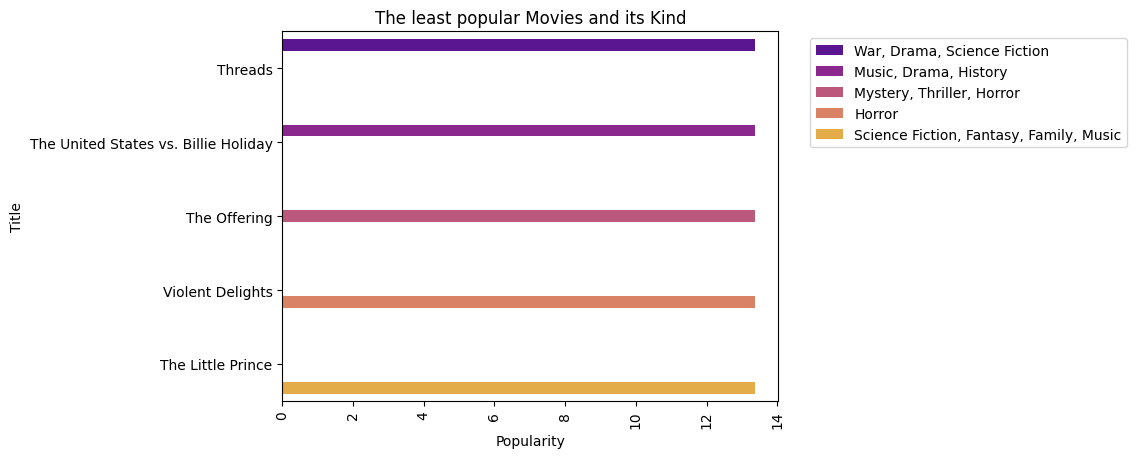

In [26]:
sns.barplot(data=least_popular,y=least_popular['Title'].head(5),x=least_popular['Popularity'],palette='plasma',hue=least_popular['Genre'].head(5))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("The least popular Movies and its Kind")

* The least popular film are :Threads and The United States vs. Billie Holiday films
* their kinds respectively :War, Drama, Science Fiction and	Music, Drama, History

# Now let's see What is the most used language

Text(0.5, 1.0, 'The most 20 used language')

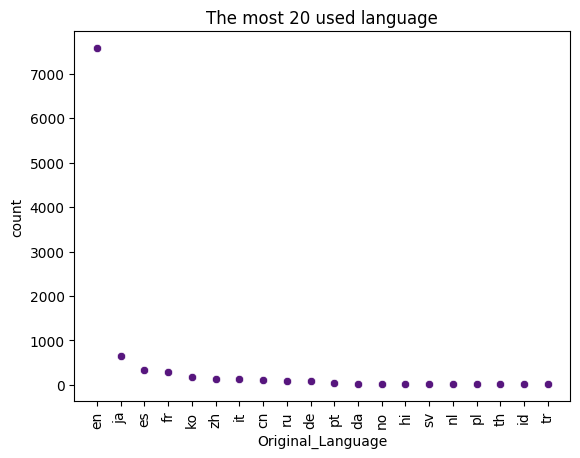

In [27]:
popular_lang=df['Original_Language'].value_counts()
sns.scatterplot(popular_lang.head(20),color='#57167E')
plt.xticks(rotation=90)
plt.title("The most 20 used language")

* English is the most used
* It is over 7000 films its original language is English

# Didn't you think about the relation between popularity and language
lets see

Text(0.5, 1.0, 'The most 30 popular Movies and its origin language')

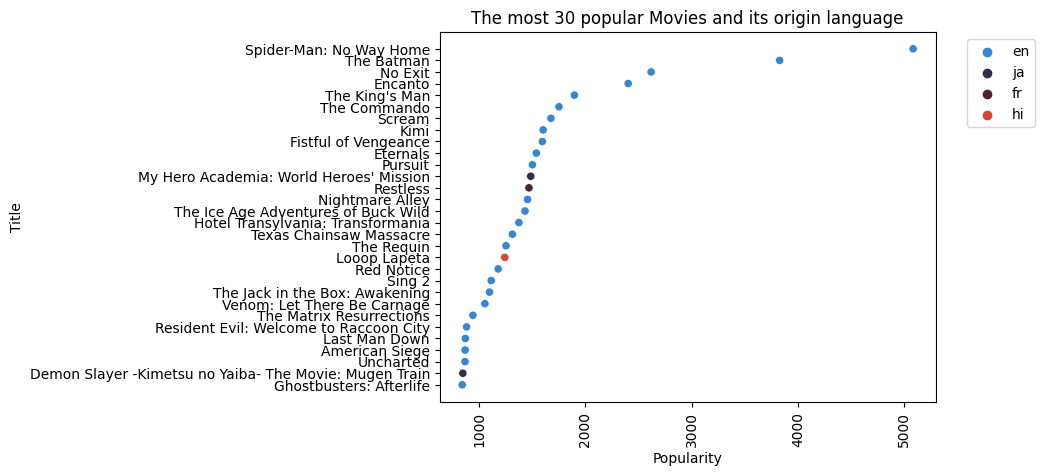

In [28]:
## i'll use the sorted_df data the is sorted by the popularity
## to see if the popularity has a relation with original language

sns.scatterplot(data=sorted_df,y=sorted_df['Title'].head(30),x=sorted_df['Popularity'],palette='icefire',hue=sorted_df['Original_Language'].head(30))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("The most 30 popular Movies and its origin language")


* the most popular language its origin language is English

# summary :

* Spider-Man: No Way Home is the highest one in popularity
* Its kind is Action, Adventure, Science Fiction


* The least popular film are :Threads and The United States vs. Billie Holiday films
* Their kinds respectively :War, Drama, Science Fiction and Music, Drama, History


* The most film genre is Drama (466 drama films)
* Comedy comes in the Second stage then Drama, Romance


* The largest number of films (714 films) produced in 2021
* then 2018 there are 530 films produced in this year


* The highest movie rate is The Shawshank Redemption film
* Its genre Drama, Crime
* Its rate is 8.560439


* The film with the lowest rate is Dragonball Evolution
* and its kind Action, Adventure, Fantasy, Science Fiction


* There are 100 films with zero Vote_Average
* Examples of them :Sideshow ,Bergen and That Which Does Not Kill


* English is the most used
* It is over 7000 films its original language is English


* The most popular language its origin language is English
